In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from statistics import mode
# warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("/workspace/KordsaIntroML/datasetsforexercises/Ibrahim.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


/tmp/ipykernel_731/3739203783.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Boş verilerin Eğitim Setinde Dağılımı')

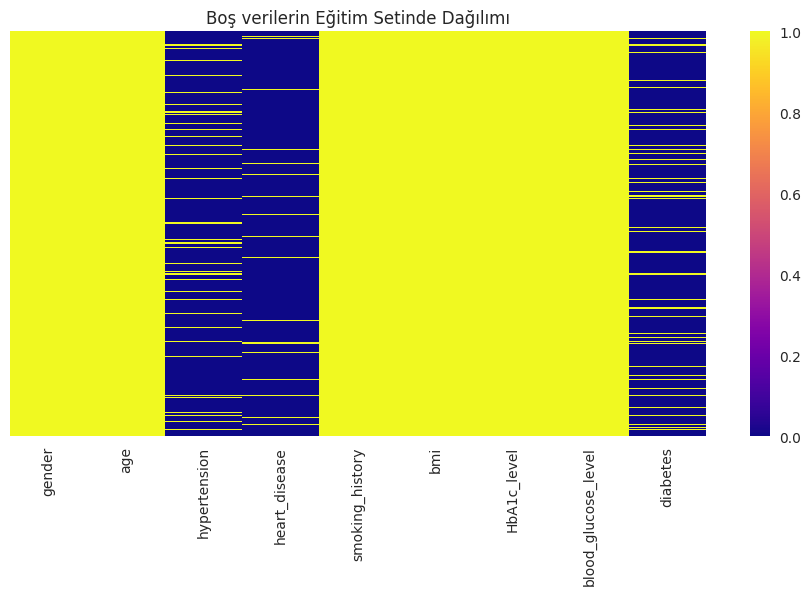

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(df[df==0].isna(),yticklabels=False,cmap='plasma')
plt.title("Boş verilerin Eğitim Setinde Dağılımı")

In [8]:
df.shape

(100000, 9)

In [9]:
df[df==0].count()

gender                     0
age                        0
hypertension           92515
heart_disease          96058
smoking_history            0
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes               91500
dtype: int64

In [10]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Encoding Variables

In [11]:
df["smoking_history"].value_counts() # Onehot encoder

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [12]:
df["gender"].value_counts() # Label Encoder 0 1

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import  LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
ct = ColumnTransformer(transformers=[("encode",OneHotEncoder(),[4])],remainder="passthrough")
dfEncoded = pd.DataFrame(data=ct.fit_transform(df))
dfEncoded.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0,0.0,1.0,25.19,6.6,140.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,27.32,6.6,80.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,28.0,0.0,0.0,27.32,5.7,158.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,23.45,5.0,155.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0,1.0,1.0,20.14,4.8,155.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,0.0,0.0,27.32,6.6,85.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44.0,0.0,0.0,19.31,6.5,200.0,1.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,23.86,5.7,85.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,42.0,0.0,0.0,33.64,4.8,145.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,32.0,0.0,0.0,27.32,5.0,100.0,0.0


<Axes: >

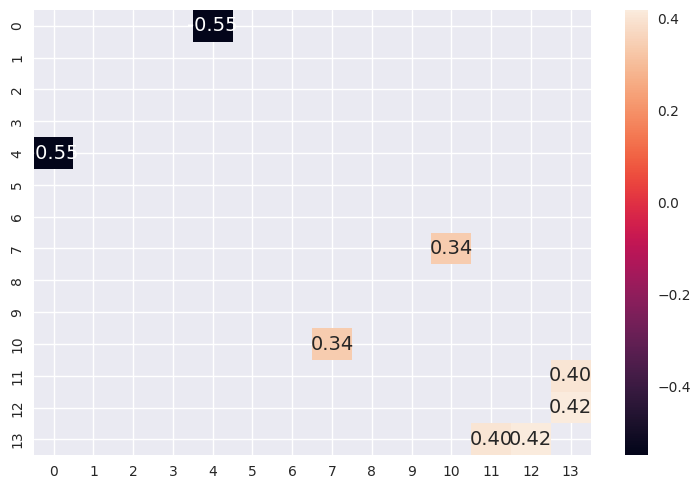

In [14]:
ornek = pd.DataFrame()
for item in dfEncoded.columns:
    if str(dfEncoded[item].dtype) != 'object':
        ornek[item] = dfEncoded[item]
corr = ornek.corr()
sns.heatmap(corr[((corr>=0.3)| (corr<=-0.3)) & (corr != 1)],annot=True,fmt='.2f')

<Axes: >

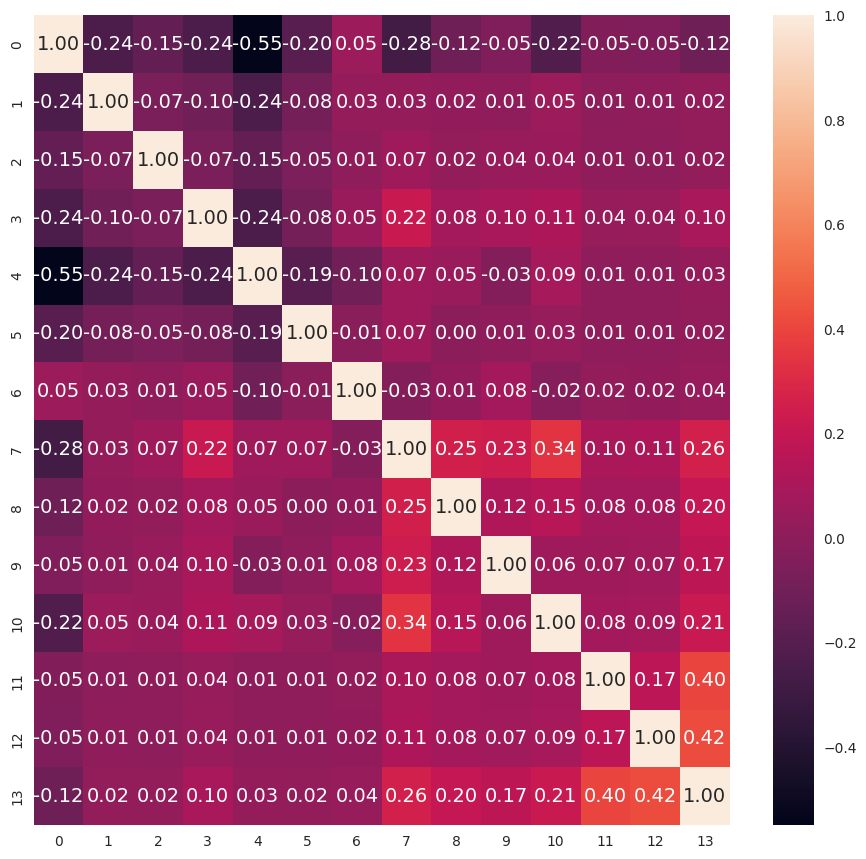

In [15]:
corr = dfEncoded.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt=".2f")

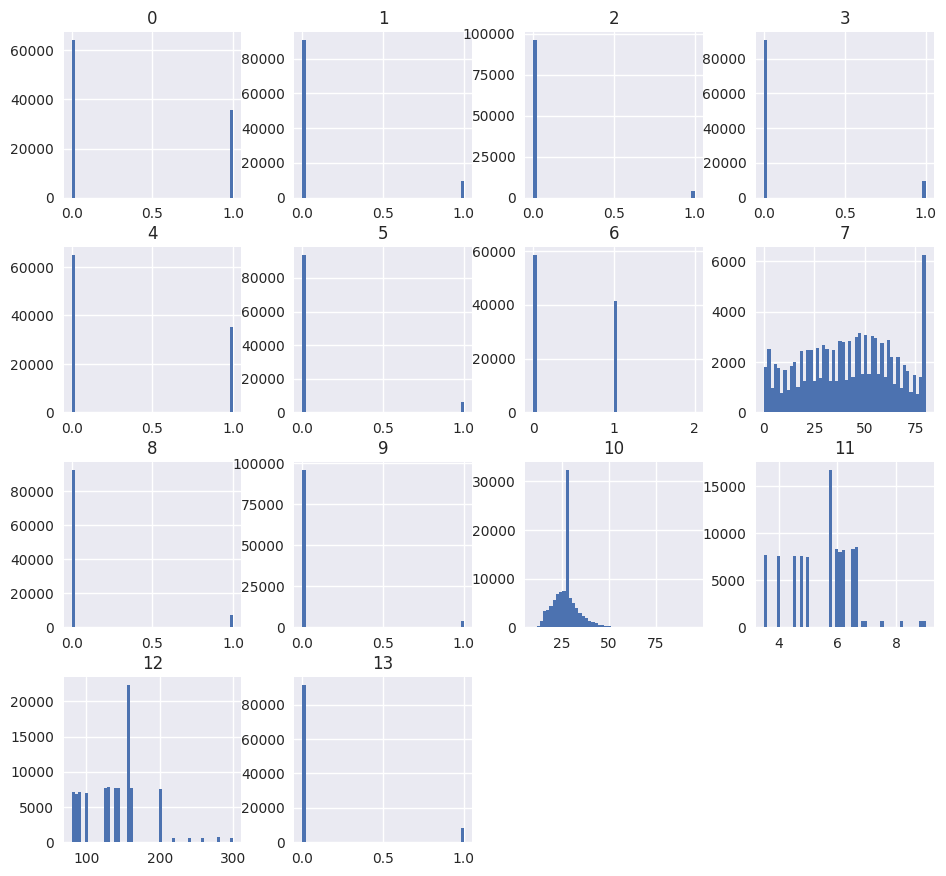

In [16]:
dfEncoded.hist(bins=50,figsize=(10,10));

Split Label and Features

In [17]:
y = dfEncoded[13].values
X = dfEncoded.drop([13],axis=1).values

Train  Test Splitting

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [20]:
pd.DataFrame(data=X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,80.0,1.0,0.0,27.32,6.5,145.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,0.0,0.0,25.18,4.5,126.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,25.95,6.6,200.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,23.43,6.0,159.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,22.62,5.0,90.0


In [21]:
pd.DataFrame(data=X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.745510,-0.320283,-0.203592,3.102285,-0.735453,-0.263176,-0.841697,1.691070,3.516004,-0.202792,0.000472,0.908249,0.170207
1,-0.745510,-0.320283,-0.203592,-0.322343,1.359706,-0.263176,-0.841697,-1.016460,-0.284414,-0.202792,-0.321772,-0.959680,-0.297058
2,1.341364,-0.320283,-0.203592,-0.322343,-0.735453,-0.263176,-0.841697,-0.261902,-0.284414,-0.202792,-0.205824,1.001645,1.522815
3,-0.745510,3.122235,-0.203592,-0.322343,-0.735453,-0.263176,-0.841697,-0.306288,-0.284414,-0.202792,-0.585289,0.441267,0.514507
4,1.341364,-0.320283,-0.203592,-0.322343,-0.735453,-0.263176,-0.841697,-0.528217,-0.284414,-0.202792,-0.707259,-0.492698,-1.182401


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [23]:
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVC', SVC()))
# models.append(('LSVC', LinearSVC()))
# models.append(('RFC', RandomForestClassifier()))
# models.append(('DTR', DecisionTreeRegressor()))

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
# from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
# seed = 7 
# sonuclar = []
# isimler = []
# for isim,model in models:
#     kfold = KFold(shuffle=True,random_state=42,n_splits=5)
#     cv_results = cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kfold)
#     sonuclar.append(cv_results)
#     isimler.append(isim)
#     print(f"{isim} {cv_results.mean()} {cv_results.std()}")

NameError: name 'sonuclar' is not defined

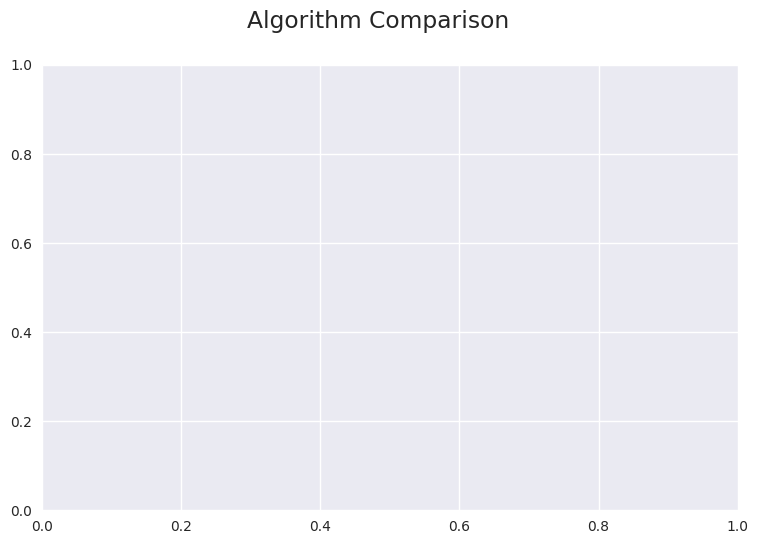

In [26]:
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(sonuclar)
# ax.set_xticklabels(isimler)
# plt.show()

In [ ]:
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# random_grid



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# model = RandomForestClassifier()
# rf_random = RandomizedSearchCV(model,random_grid, n_iter = 4,cv = 5,random_state=42)
# rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [ ]:
# rf_random.best_score_

0.971775

In [ ]:
# modelSon = rf_random.best_estimator_

In [ ]:
# rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [ ]:
# 'n_estimators': 200,
#  'min_samples_split': 10,
#  'min_samples_leaf': 2,
#  'max_features': 'sqrt',
#  'max_depth': 50,
#  'bootstrap': True

In [28]:

model = RandomForestClassifier(n_estimators= 200,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth= 50,bootstrap=True)
model.fit(X_train,y_train)


RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [29]:
y_preds = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
confusion_matrix(y_test,y_preds)

array([[18286,    14],
       [  540,  1160]])

<Axes: >

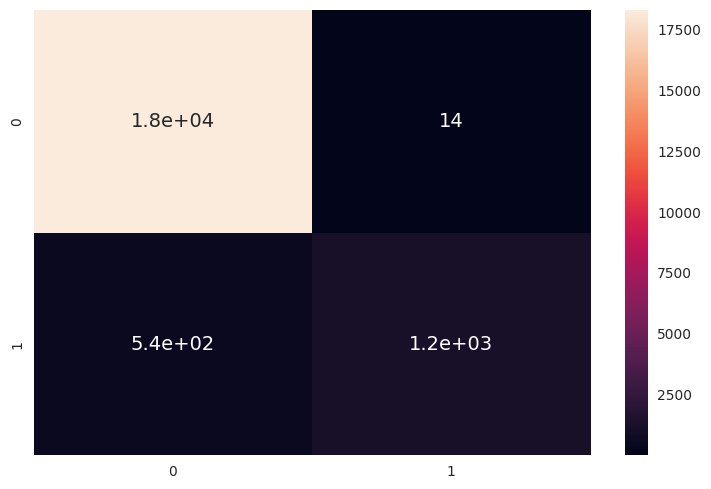

In [32]:
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

In [35]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18300
         1.0       0.99      0.68      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
from sklearn.pipeline import Pipeline

# from sklearn.preprocessing import  LabelEncoder,OneHotEncoder
# from sklearn.compose import ColumnTransformer
# le = LabelEncoder()
# df["gender"] = le.fit_transform(df["gender"])
# ct = ColumnTransformer(transformers=[("encode",OneHotEncoder(),[4])],remainder="passthrough")
# dfEncoded = pd.DataFrame(data=ct.fit_transform(df))



# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_scaled = sc.transform(X_train)
# X_test_scaled = sc.transform(X_test)



In [43]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [39]:
dfEncoded.head() # 0.0,1.0,0.0,0.0,0.0,0.0,1.0,41.0,0,0,27.15,4.5,160

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0,0.0,1.0,25.19,6.6,140.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,27.32,6.6,80.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,28.0,0.0,0.0,27.32,5.7,158.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,23.45,5.0,155.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0,1.0,1.0,20.14,4.8,155.0,0.0


In [42]:
from sklearn.pipeline import Pipeline
y = dfEncoded[13].values
X = dfEncoded.drop([13],axis=1).values
adimlar = [("scaler",StandardScaler()),
("RandomForest",
    RandomForestClassifier(n_estimators= 200,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth= 50,
    bootstrap=True))]

pipeline = Pipeline(adimlar)
pipeline.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest',
                 RandomForestClassifier(max_depth=50, min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=200))])

In [47]:


pipeline.predict([[0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,0,0,30.15,4.5,150]])

array([0.])

In [48]:
import pickle
pickle.dump(pipeline,open("piplinemodel.pkl","wb"))

In [50]:
model = pickle.load(open("piplinemodel.pkl","rb"))

https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156

In [51]:
model.predict([[0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,0,0,30.15,4.5,150]])

array([0.])